**TASK # 4 - TO EXPLORE DECISION TREE ALGORITHM**

For the given ‘Iris’ dataset, create the Decision Tree classifier and
visualize it graphically.

In [ ]:
import pandas as pd

In [ ]:
#Download the Iris dataset
url = "https://drive.google.com/file/d/11Iq7YvbWZbt8VXjfm06brx66b10YiwK-/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
data = pd.read_csv(path)

# Explore the dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data = data.drop(["Id"] , axis = 1)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
data.shape

(150, 5)

In [ ]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**converting varibale data to numerical data**

In [ ]:
import sklearn
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()

In [ ]:
data[data.select_dtypes(include=['object']).columns] = data[data.select_dtypes(include=['object']).columns].apply(LE.fit_transform)

In [ ]:
data

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


**division of data**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_x = data.drop(["Species"], axis = 1)
data_y = data.Species

In [ ]:
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size = .2, random_state = 0)

In [ ]:
print(data_x_train.shape)
print(data_y_train.shape)
print(data_x_test.shape)
print(data_y_test.shape)

(120, 4)
(120,)
(30, 4)
(30,)


**Model creation**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
dt = DecisionTreeClassifier(criterion='gini' , max_depth=5)

In [ ]:
dt.fit(data_x_train , data_y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Prediction to be done on the builded model**

In [ ]:
pred_dt = dt.predict(data_x_test)

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
table_dt = confusion_matrix(pred_dt , data_y_test)
table_dt

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

**Model accuracy**

In [ ]:
table_dt.diagonal().sum()

30

In [ ]:
table_dt.sum()

30

In [ ]:
acc = table_dt.diagonal().sum() / table_dt.sum() * 100
acc

100.0

**Visualisation of the model built using a desicion tree**

In [ ]:
from IPython.display import Image  
from sklearn.externals.six import StringIO 
from sklearn.tree import export_graphviz
import pydotplus
import pydot

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [ ]:
from sklearn import tree
import graphviz

In [ ]:
data_x_train_names = data_x_train.columns

In [ ]:
dot_data = tree.export_graphviz(dt , out_file = None)
graph = graphviz.Source(dot_data)

In [ ]:
import matplotlib.pyplot as plt

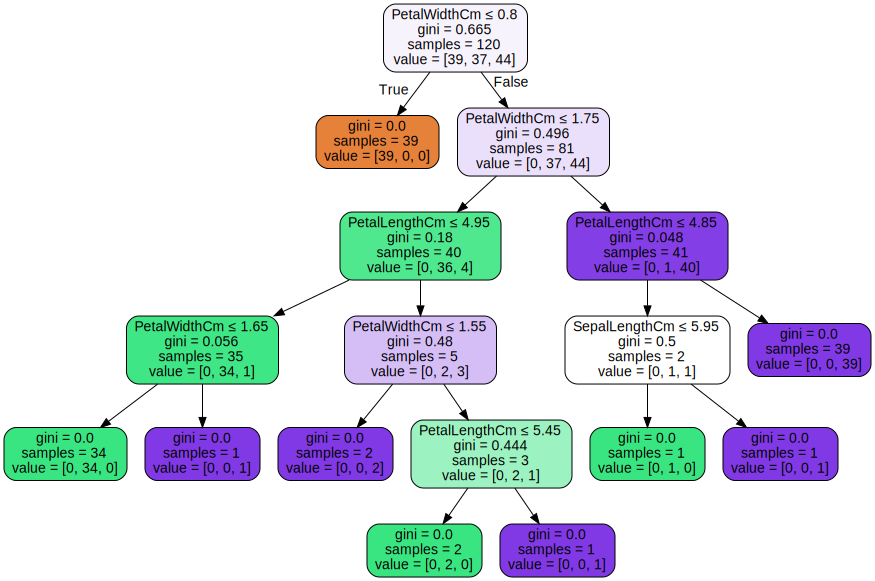

<Figure size 432x432 with 0 Axes>

In [ ]:
fig = plt.figure(figsize = (6,6))
dot_data = tree.export_graphviz(dt , out_file= None,
                               feature_names=data_x_train_names,
                               filled= True, rounded = True,
                               special_characters= True)
graph = graphviz.Source(dot_data)
graph

**Feeding test data to classifier**

In [ ]:
dt1 = DecisionTreeClassifier(criterion='gini' , max_depth=5)

In [ ]:
dt1.fit(data_x_test , data_y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
data_x_test_names = data_x_test.columns

In [ ]:
dot_data1 = tree.export_graphviz(dt1 , out_file = None)
graph1 = graphviz.Source(dot_data1)

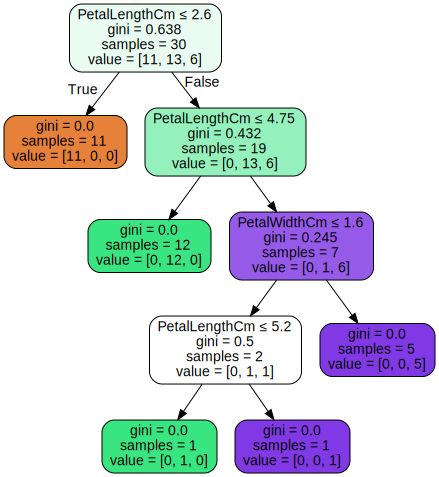

<Figure size 432x432 with 0 Axes>

In [ ]:
fig = plt.figure(figsize = (6,6))
dot_data1 = tree.export_graphviz(dt1 , out_file= None,
                               feature_names=data_x_test_names,
                               filled= True, rounded = True,
                               special_characters= True)
graph1 = graphviz.Source(dot_data1)
graph1

**Boosting the model using ADA Boost Classifier**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
abc = AdaBoostClassifier(DecisionTreeClassifier() , n_estimators= 15)

In [ ]:
abc.fit(data_x_train , data_y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [ ]:
pred_boost = abc.predict(data_x_test)

In [ ]:
tab_boost = confusion_matrix(pred_boost , data_y_test)
tab_boost

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]])

In [ ]:
acc1 = tab_boost.diagonal().sum() / tab_boost.sum() * 100
acc1

100.0

**Conclusion**

**Model has been successfully built on desicion tree classifier.**

**Visual representation has been done.**

**Model builded comes out to be great model with accuracy of 100%.**

**Boosting also has been done to the model using ada boost classifier which makes it further a excellent model for prediction of the new data set.**

**Feeding new data/test data to this model will be a good option as shown above because it can predict right class values and also have high accuracy**